In [67]:
import rasterio as rio
from rasterio.plot import show
from sklearn import cluster
import matplotlib.pyplot as plt
import numpy as np

In [69]:
# Open the image 
mangrove_raster = rio.open("D:/Summers2021/RemoteSensing/data/Sentinel2A_BHK_15032021.tif")
print(mangrove_raster.meta)

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': None, 'width': 1219, 'height': 901, 'count': 12, 'crs': CRS.from_epsg(4326), 'transform': Affine(8.983152841195215e-05, 0.0, 86.82244170473699,
       0.0, -8.983152841195215e-05, 20.75952722683167)}


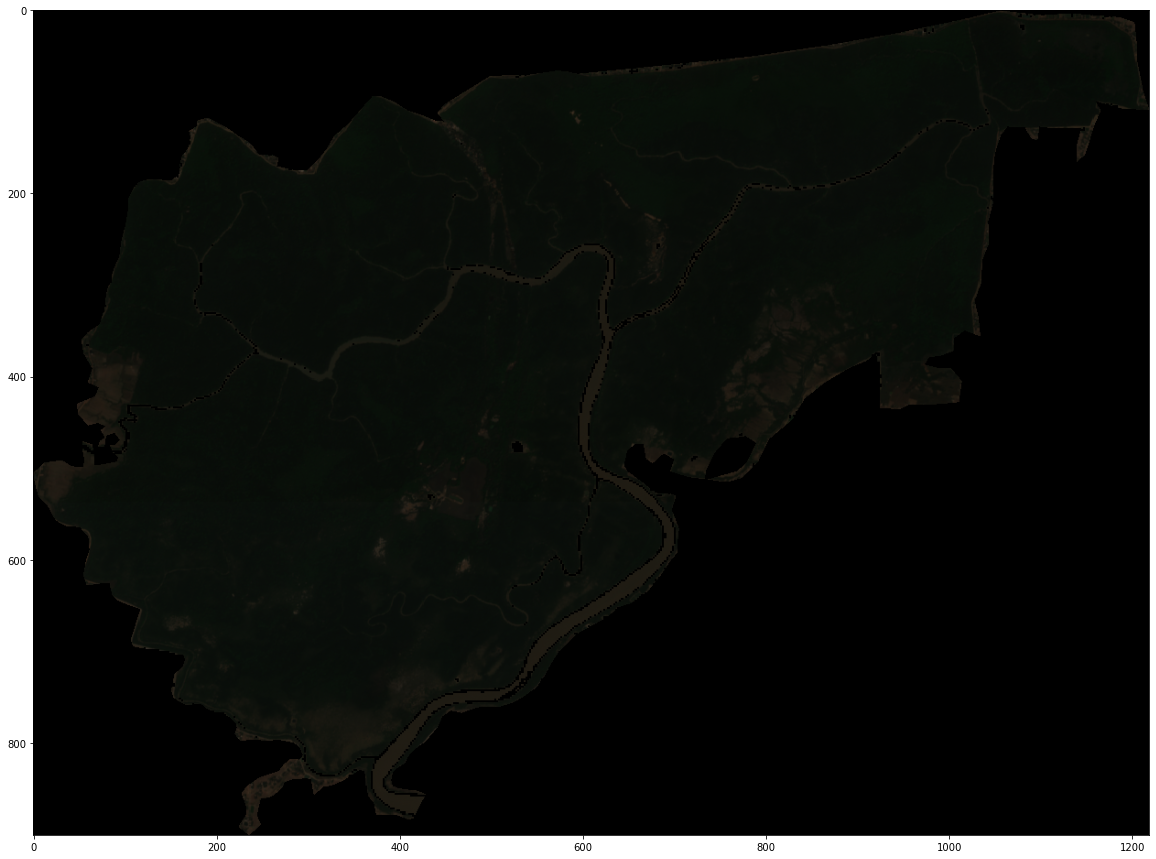

In [3]:
#rgb image

r = mangrove_raster.read(4)
g = mangrove_raster.read(3)
b = mangrove_raster.read(2)

rgb = np.dstack((r,g,b))
rgb = np.nan_to_num(rgb,-999)

vmin, vmax = np.nanpercentile(rgb, (5,95))

plt.figure(figsize=[20,20])
plt.imshow(rgb,vmax = vmax, vmin = vmin)


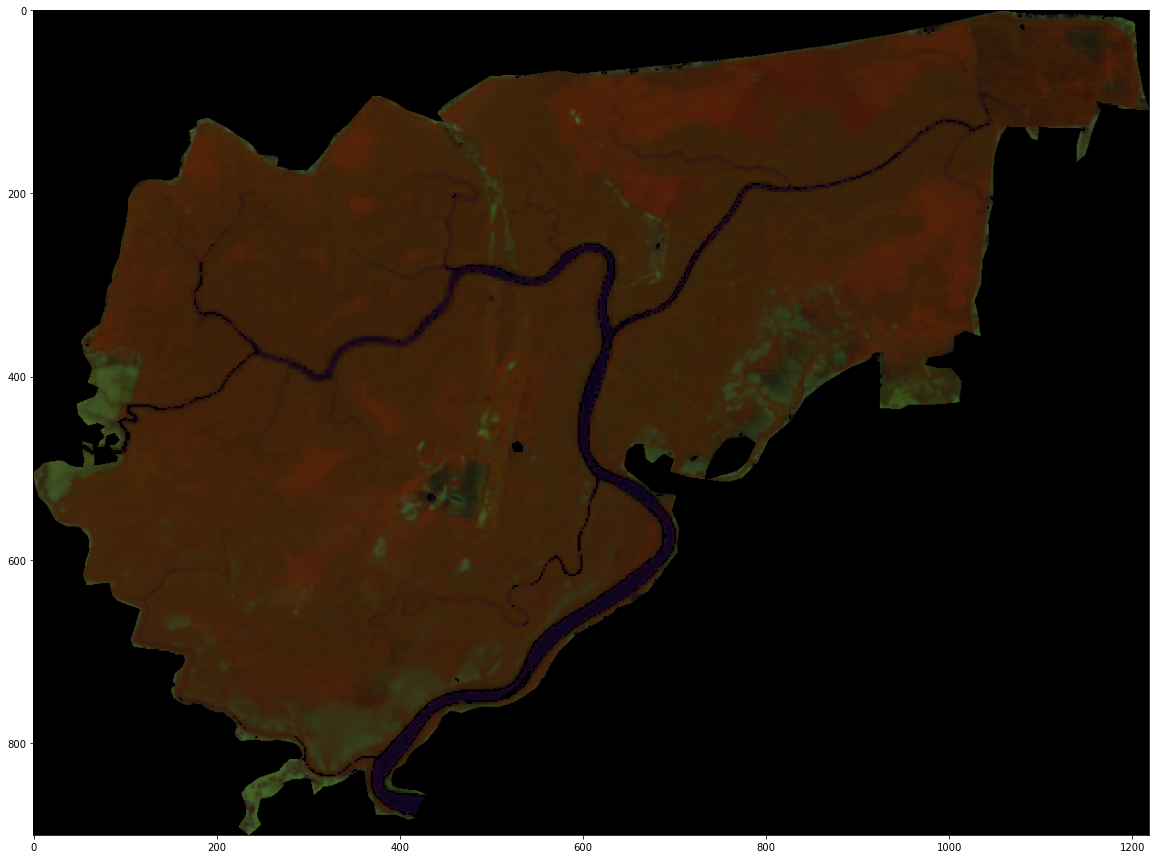

In [70]:
#Vegetation Red Edge+SWIR+Red

re = mangrove_raster.read(9)
swir = mangrove_raster.read(11)
r2 = mangrove_raster.read(4)

stk = np.dstack((re,swir,r2))

stk = np.nan_to_num(stk,-999)

vmin, vmax = np.nanpercentile(stk, (5,95))
plt.figure(figsize=[20,20])
plt.imshow(stk,vmin=vmin, vmax=vmax )

# # Read, enhance and show the image
# mangrove_arr = stk.read() # read the opened image
# vmin, vmax = np.nanpercentile(mangrove_arr, (5,95))  # 5-95% contrast stretch
# show the enhanced image
# plt.figure(figsize=[20,20])
# show(stk, cmap='gray', vmin=vmin, vmax=vmax)
# plt.show()

In [71]:
# create an empty array with same dimension and data type
imgxyb = np.empty((mangrove_raster.height, mangrove_raster.width, 3), mangrove_raster.meta['dtype'])
# loop through the raster's bands to fill the empty array

#bands = [9,11,4]

imgxyb[:,:,0] = mangrove_raster.read(9)
imgxyb[:,:,1] = mangrove_raster.read(11)
imgxyb[:,:,2] = mangrove_raster.read(4)


In [72]:
# convert to 1d array
img1d=imgxyb[:,:,:].reshape((imgxyb.shape[0]*imgxyb.shape[1],imgxyb.shape[2]))
#imputing nan value
img1d = np.nan_to_num(img1d,-999)

In [73]:
img1d.shape


(1098319, 3)

In [ ]:
#For bands = [9,11,4]

#kmeans
cl = cluster.KMeans(n_clusters=5) # create an object of the classifier
param = cl.fit(img1d) # train it
img_cl = cl.predict(img1d) # get the labels of the classes
img_cl = img_cl.reshape(imgxyb[:,:,0].shape) # reshape labels to a 3d array (one band only)


#GMM clustering
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=5)
param1 = gmm.fit(img1d)
img_cl1 = gmm.predict(img1d)# get the labels of the classes
img_cl1 = img_cl1.reshape(imgxyb[:,:,0].shape) # reshape labels to a 3d array (one band only)


In [55]:
img_cl1.shape

(901, 1219)

Text(0.5, 1.0, 'Second')

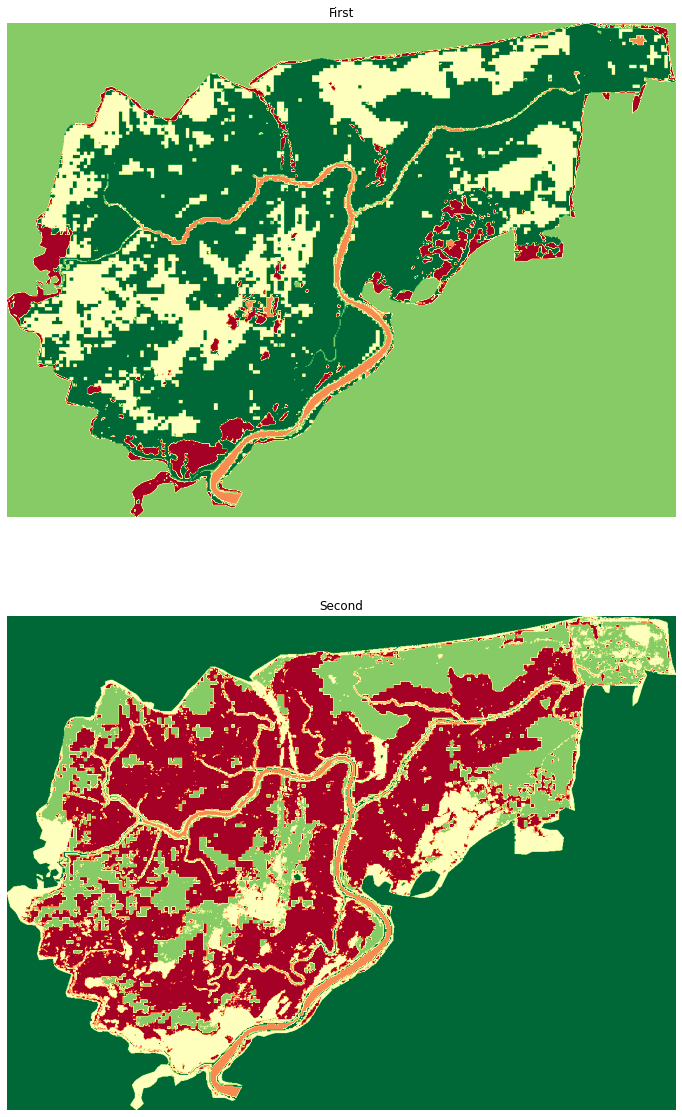

In [66]:
# from matplotlib import mc
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
# # Create a custom color map to represent our different 4 classes
# cmap = mc.LinearSegmentedColormap.from_list("", ["black","red","green","yellow"])




fig = plt.figure(figsize=(20, 20))
# Adds a subplot at the 1st position
fig.add_subplot(2, 1, 1)
  
# showing image
plt.imshow(img_cl,cmap='RdYlGn_r')
plt.axis('off')
plt.title("First")
  
# Adds a subplot at the 2nd position
fig.add_subplot(2, 1, 2)
  
# showing image
plt.imshow(img_cl1,cmap='RdYlGn_r')
plt.axis('off')
plt.title("Second")


#c

In [ ]:
ValueError: 'YlO' is not a valid value for name; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'